<a href="https://colab.research.google.com/github/bhanuprakash003/hotel-booking-EDA-project/blob/main/Copy_of_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> <u><center>Capstone Project - I: Hotel Booking Analysis </b></u>

#Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

#Reading CSV file

In [ ]:
dataframe=pd.read_csv("/content/Hotel Bookings (1).csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Creating a copy as df

In [ ]:
df=dataframe.copy()

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.shape

(119390, 32)

#Data Cleaning and Visualizations


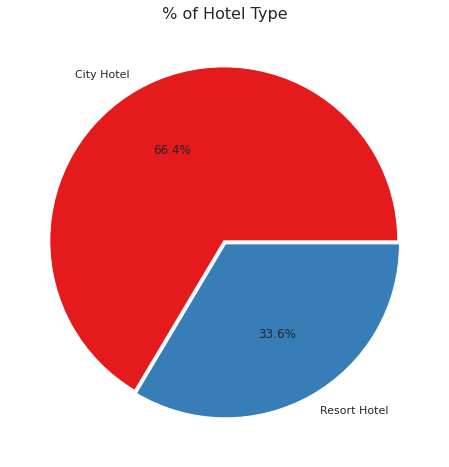

In [69]:
plt.pie(df["hotel"].value_counts(),explode=[0.01, 0.01], autopct='%1.1f%%',labels=['City Hotel','Resort Hotel'])
plt.title(" % of Hotel Type ",fontsize=16);

66.40% City hotel and 33.60% Resort Hotel


In [70]:
df["hotel"].unique().tolist()

['Resort Hotel', 'City Hotel']

#1. Which Hotel has the highest Lead Time

Text(0.5, 1.0, 'lead Time')

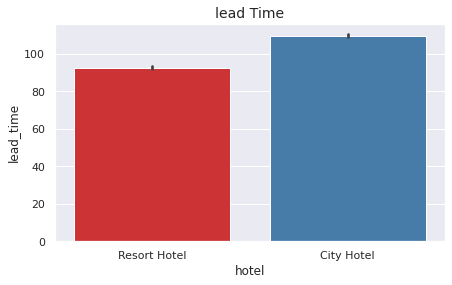

In [71]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x=df["hotel"],y=df["lead_time"])
ax.set_title("lead Time",fontsize=14)


lead Time :

The number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

City Hotel is the Highest Lead Time


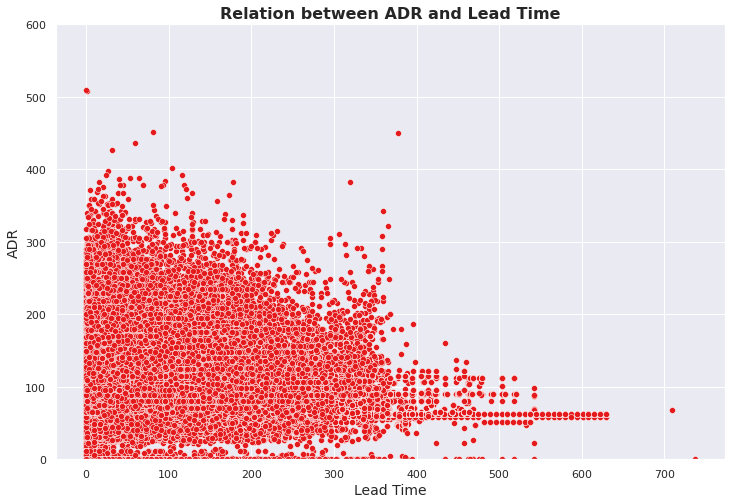

In [72]:
graph = sns.scatterplot(data = df, x = 'lead_time', y = 'adr')
graph.set_title('Relation between ADR and Lead Time',fontsize = 16, fontweight='bold')
graph.set_xlabel('Lead Time',fontsize = 14)
graph.set_ylabel('ADR',fontsize = 14)
graph.set_ylim(0,600);

#2. Which year has the highest arrival rate

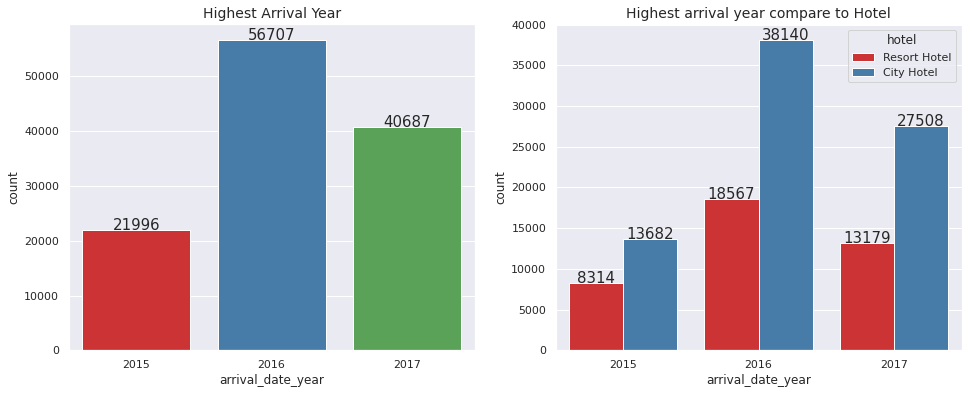

In [73]:
figure,axes=plt.subplots(1, 2,figsize=(16,6))

graph=sns.countplot(x=df["arrival_date_year"],ax=axes[0])

ax=sns.countplot(x=df["arrival_date_year"],data=df,hue='hotel',ax=axes[1]);
graph.set_title('Highest Arrival Year',fontsize=14)
ax.set_title('Highest arrival year compare to Hotel',fontsize=14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);

for rect in graph.patches:
   graph.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


#Highest arrival year

2016 is the Highest arrival year

City Hotel is having Highest Arrival rate in all three years


#3. Which month has the highest arrival rate

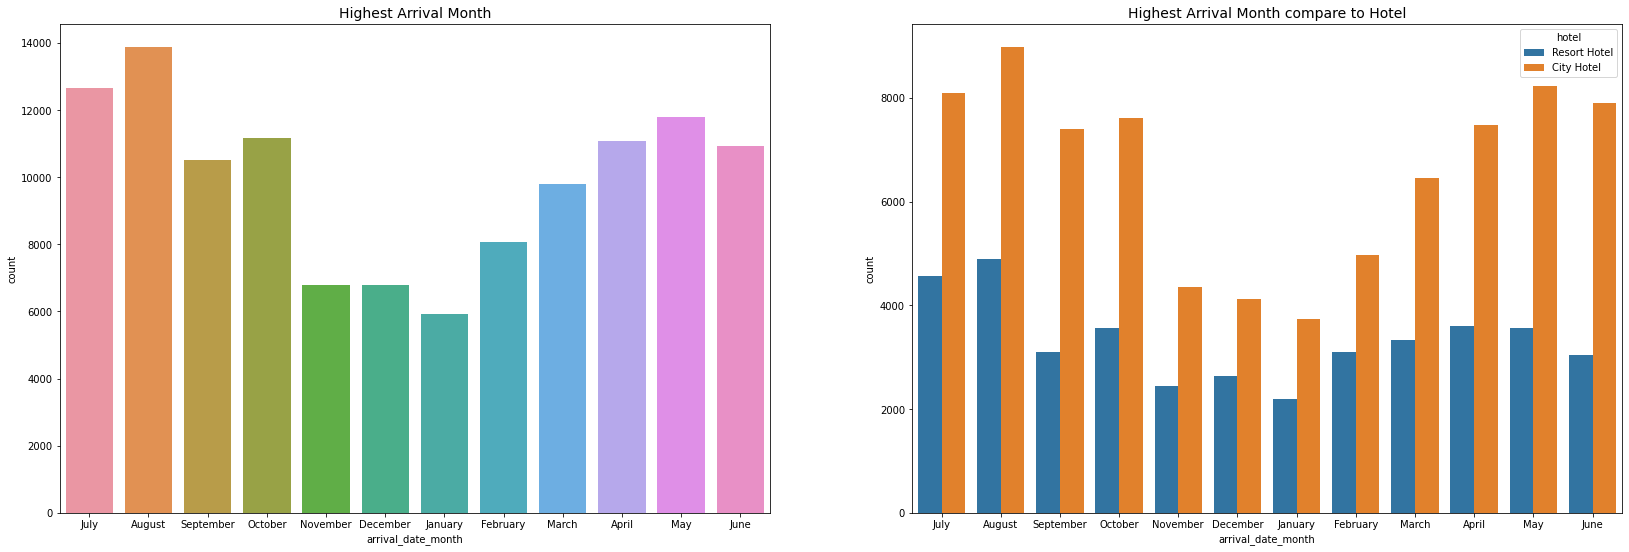

In [ ]:
figure,axes=plt.subplots(1,2,figsize=(28,9))
graph=sns.countplot(x=df["arrival_date_month"],ax=axes[0])
graph1=sns.countplot(x=df["arrival_date_month"],data=df,hue='hotel',ax=axes[1])
graph.set_title('Highest Arrival Month',fontsize=14)
graph1.set_title('Highest Arrival Month compare to Hotel',fontsize=14);

Customer Arrival is high in August month in all the years of the data

The customer Arrival rate is high in City Hotel than in Resort Hotel August month in all the years of the data


<Figure size 792x432 with 0 Axes>

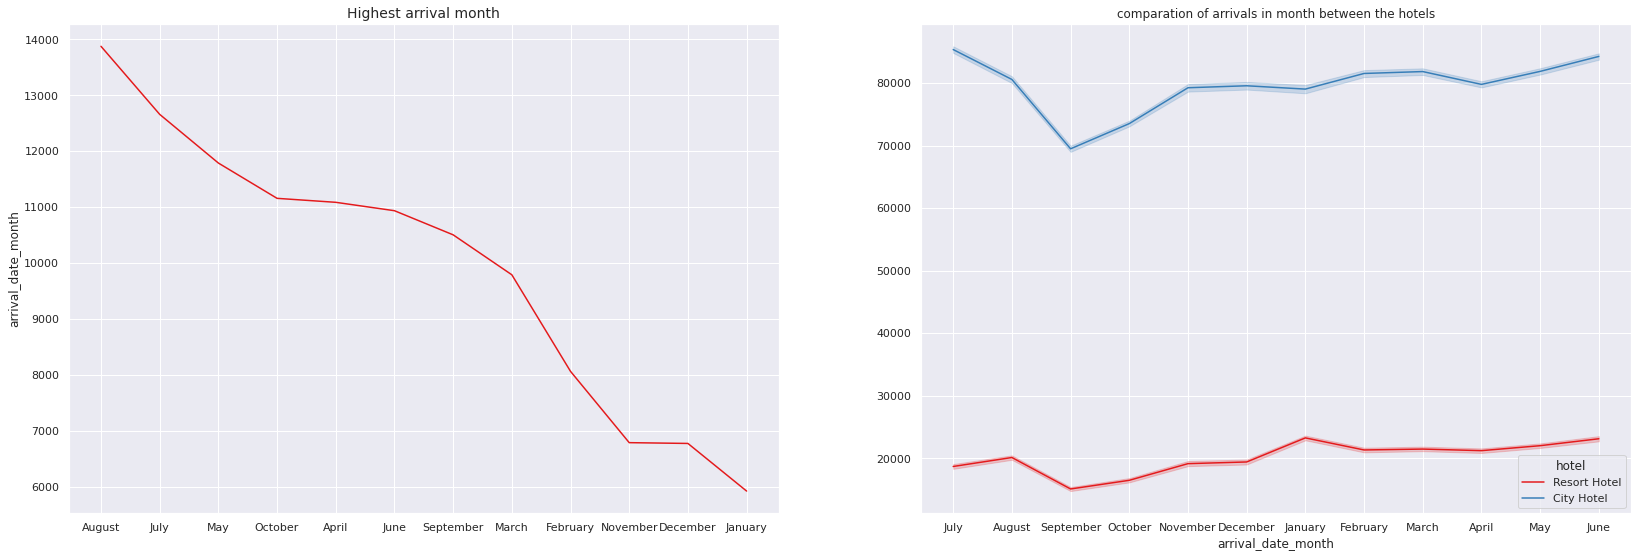

In [74]:
month=pd.DataFrame(df["arrival_date_month"].value_counts())
plt.figure(figsize=(11,6))
figure,axes=plt.subplots(1,2,figsize=(28,9))
ax=sns.lineplot(x=month.index,y=month["arrival_date_month"],ax=axes[0])
ax.set_title('Highest arrival month',fontsize=14)
graph1=sns.lineplot(y=df['arrival_date_month'].index,x=df['arrival_date_month'],hue="hotel",data=df,ax=axes[1])
graph1.set_title("comparation of arrivals in month between the hotels");

<center><b> Line graph for Highest arrival month

#4. Most people Stay at Nights

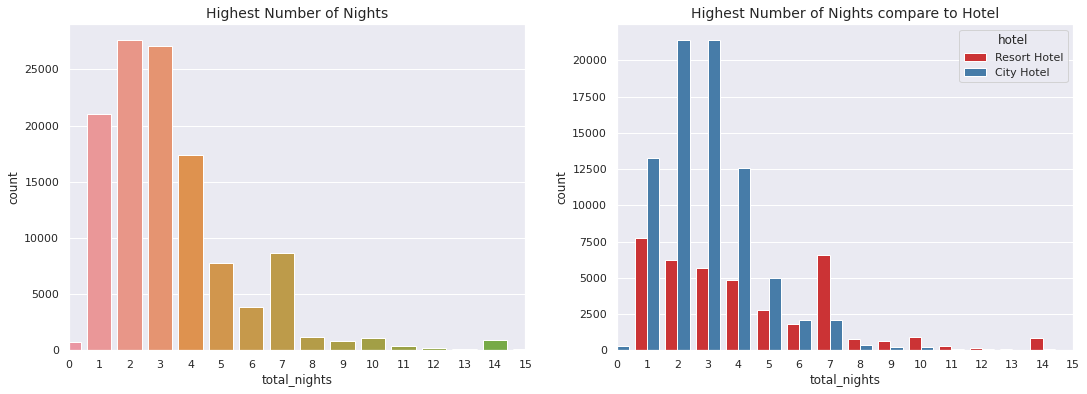

In [75]:
df["total_nights"]=df["stays_in_weekend_nights"]+df["stays_in_week_nights"]
fig,axes=plt.subplots(1,2,figsize=(18,6))
graph1=sns.countplot(df["total_nights"],hue='hotel',data=df,ax=axes[1])
graph1.set_title('Highest Number of Nights compare to Hotel',fontsize=14)
graph=sns.countplot(df["total_nights"],ax=axes[0])
graph.set_title('Highest Number of Nights',fontsize=14)
graph.set_xlim(0,15)
graph1.set_xlim(0,15);


People wish for a night stay in a hotel for 2 to 3 days rather than a week or more


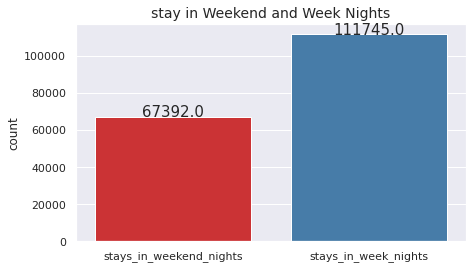

In [76]:
x=pd.DataFrame(df["stays_in_weekend_nights"].value_counts()).sort_index()
x=int(x.iloc[1:].sum())
y=pd.DataFrame(df["stays_in_week_nights"].value_counts()).sort_index()
y=int(y.iloc[1:].sum())
r=[x,y]
r=pd.Series(r).rename(index={0:"stays_in_weekend_nights",1:"stays_in_week_nights"})
plt.figure(figsize=(7,4))
ax=sns.barplot(x=r.index,y=r)
ax.set_title('stay in Weekend and Week Nights',fontsize=14)
ax.set_ylabel('count')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


People prefer night stays during Weeks than Weekend Nights, which is profitable to hotel management

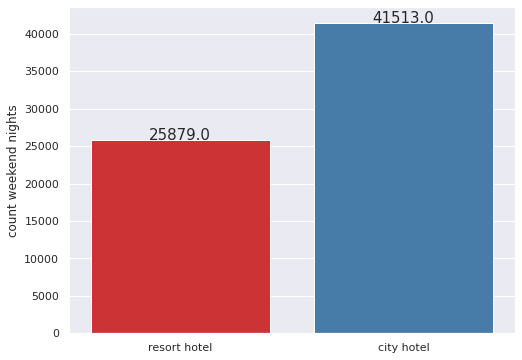

In [77]:
city_Hotel=0
resort_hotel=0
for i in range(len(df)):
    if df.iloc[i]['hotel']=="Resort Hotel":
        if df.iloc[i]["stays_in_weekend_nights"]>0:
            resort_hotel=resort_hotel+1
    else:
        if df.iloc[i]["stays_in_weekend_nights"]>0:
            city_Hotel=city_Hotel+1
RH=(resort_hotel,city_Hotel)
x=pd.DataFrame(RH).rename(columns={0:"count weekend nights"},index={0:"resort hotel",1:"city hotel"})
plt.figure(figsize=(8,6))
ax=sns.barplot(x=x.index,y=x['count weekend nights'])
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);

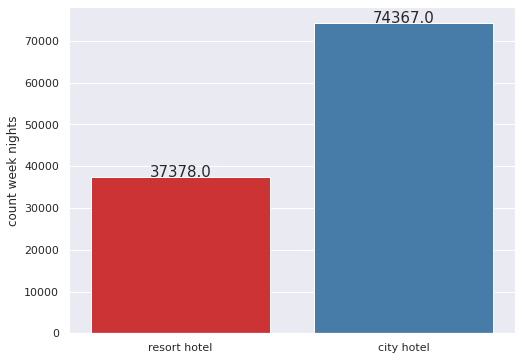

In [78]:
city_Hotell=0
resort_hotell=0
for i in range(len(df)):
    if df.iloc[i]['hotel']=="Resort Hotel":
        if df.iloc[i]["stays_in_week_nights"]>0:
            resort_hotell=resort_hotell+1
    else:
        if df.iloc[i]["stays_in_week_nights"]>0:
            city_Hotell=city_Hotell+1
HR=(resort_hotell,city_Hotell)
y=pd.DataFrame(HR).rename(columns={0:"count week nights"},index={0:"resort hotel",1:"city hotel"})
plt.figure(figsize=(8,6))
ax=sns.barplot(x=y.index,y=y['count week nights'])
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


Hotel preference of most people tostay on Weekend Nights ofall years of the given data.People prefer to chooseCity Hotel over Resort Hotel



#5. Which type of Guest

In [79]:
single=0
couple=0
family=0
kids=0
type_=[]
for i in range(len(df)):   
    if (df.loc[i]['adults']==2) & (df.loc[i]['children']==0) & (df.loc[i]['babies']==0) :
        couple=couple+1
        type_.append("couples")
        
    elif (df.loc[i]['adults']==1) & (df.loc[i]['children']==0) & (df.loc[i]['babies']==0):
        single=single+1
        type_.append("singles")
    elif ((df.loc[i]['adults']==0)&((df.loc[i]['children']+df.loc[i]['babies'])>0)):
        kids=kids+1
        type_.append("kids")
        
    else:
        family=family+1
        type_.append("familys")
print(single,couple,family,kids)

df["family_status"]=type_

22577 81557 15033 223


In [88]:
df['family_status'].value_counts()

couples    81557
singles    22577
familys    15033
kids         223
Name: family_status, dtype: int64

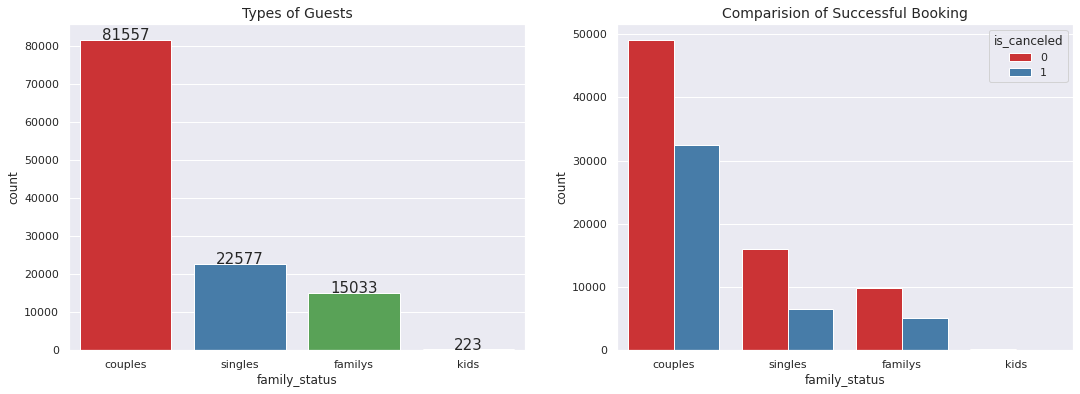

In [81]:
fig,axes=plt.subplots(1,2,figsize=(18,6))
ax=sns.countplot(df["family_status"],ax=axes[0])
graph1=sns.countplot(df['family_status'],hue="is_canceled",data=df,ax=axes[1])
graph1.set_title("Comparision of Successful Booking",fontsize=14)
ax.set_title("Types of Guests",fontsize=14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


From above analysis we have observe most bookings are from couples



#6. Adult count in Hotels

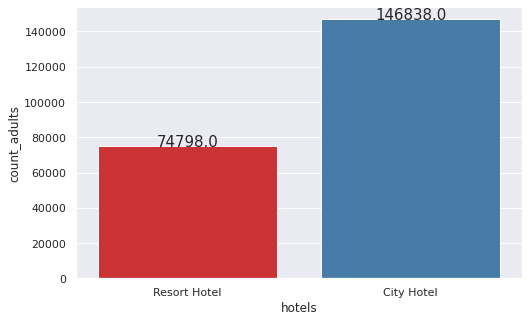

In [82]:
resort_hotel=df[df['hotel']=="Resort Hotel"]
a=resort_hotel["adults"].sum()
city_hotel=df[df['hotel']=="City Hotel"]
b=city_hotel["adults"].sum()
no_adults=pd.Series(data=(a,b),index=["Resort Hotel","City Hotel"])
plt.figure(figsize=(8,5))
ax=sns.barplot(x=no_adults.index,y=no_adults)
plt.ylabel('count_adults')
plt.xlabel('hotels')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


Most of the adults choose to stay in City Hotel


#7. Repeated Guests data

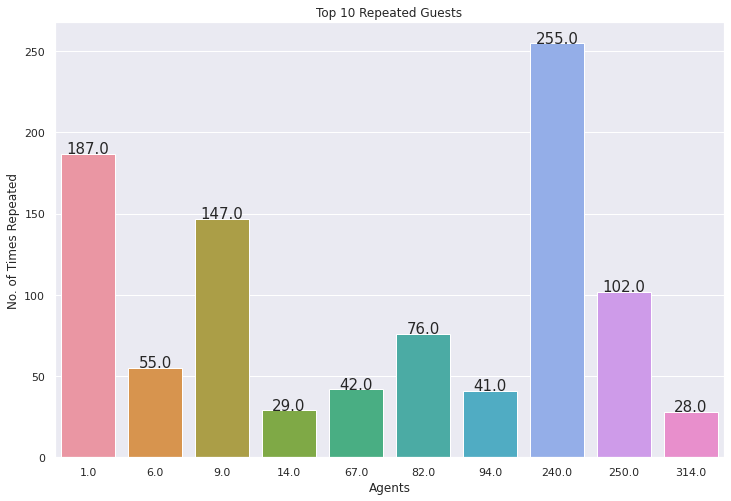

In [83]:
agents=[]
for i in range(len(df)):
    if df.iloc[i]["is_repeated_guest"]==1:
        agent=df.iloc[i]["agent"]
        agents.append(agent)
x=pd.Series(agents).value_counts().nlargest(10)
ax=sns.barplot(x=x.index,y=x)
plt.title('Top 10 Repeated Guests')
plt.ylabel("No. of Times Repeated")
plt.xlabel("Agents")
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


Could see that repeated customers are choosing the prior agents to book their stay and agent 240.0 is making the big number and helping the customers to pick the hotel.

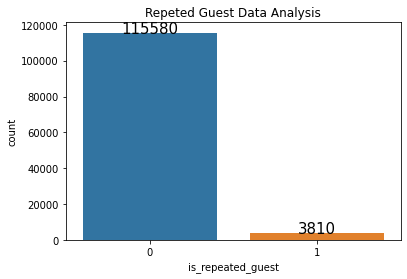

In [ ]:
ax=sns.countplot(df["is_repeated_guest"])
plt.title("Repeted Guest Data Analysis")
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


Most of the arrivals from new customers. Repeated customers are very less compare to the new customers


#8. Preferred Hotel by the agent for booking

In [84]:
def agent():
    Resort_Hotel1=[]
    City_hotel1=[]
    agents=[]
    x=pd.Series(df['agent'].value_counts()).nlargest(10)
    
    for j in x.index:
        Resort_Hotel=0
        City_hotel=0       
        for i in range(len(df)):
            if df.iloc[i]["agent"]==j:
                if df.iloc[i]["hotel"]=='Resort Hotel':
                    Resort_Hotel=Resort_Hotel+1
                else:
                    City_hotel=City_hotel+1
        Resort_Hotel1.append(Resort_Hotel)
        City_hotel1.append(City_hotel)
        agents.append(j)  
    D=pd.DataFrame((City_hotel1,Resort_Hotel1,agents))
    C=D.T.rename(columns={0:'resort hotel',1:"city hotel",2:'agents'})
    fig,axes=plt.subplots(1,2,figsize=(16,4))
    ax=sns.barplot(x=C["agents"],y=C["resort hotel"],ax=axes[0])
    ax1=sns.barplot(x=C["agents"],y=C["city hotel"],ax=axes[1])
    ax.set_title("Agents standings for Resort Hotel",fontsize=14)
    ax1.set_title("Agents standings for City Hotel",fontsize=14)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 12);
    for rect in ax1.patches:
        ax1.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 12);


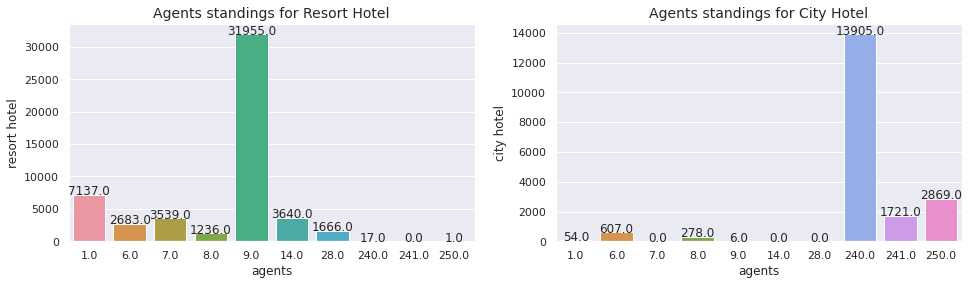

In [85]:
agent()

#9. Meals Analysis

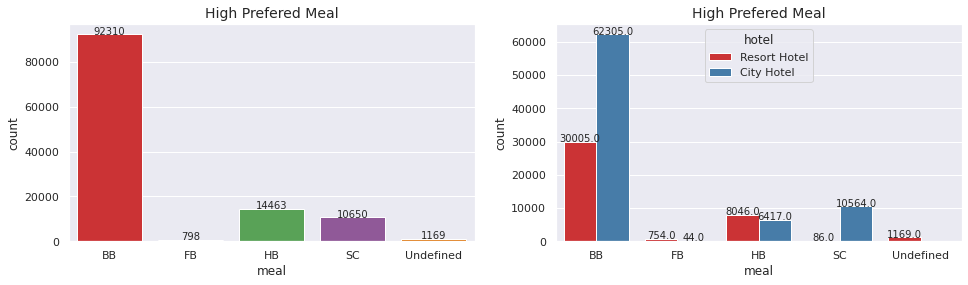

In [86]:
figure,axes=plt.subplots(1,2,figsize=(16,4))
ax=sns.countplot(x=df["meal"],ax=axes[0])
graph1=sns.countplot(x=df["meal"],data=df,hue='hotel',ax=axes[1])
ax.set_title('High Prefered Meal',fontsize=14)
graph1.set_title('High Prefered Meal',fontsize=14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 10)
for rect in graph1.patches:
    graph1.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 10);


Most of the peoples prefer to have BB(Bed and Breakfast) and meal type in both the hotel type.

#10. Most customers visit from top counties

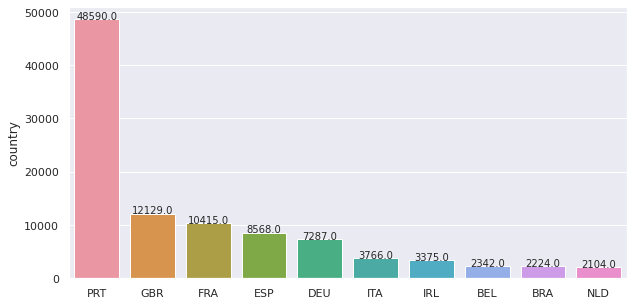

In [87]:
country=(df['country'].value_counts()).head(10)
plt.figure(figsize=(10,5))
ax=sns.barplot(x=country.index,y=country)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 10)


Most of the customers visited from PRT(Portugal) country than the other countries

#11. Which channel is mostly used for early booking of hotels

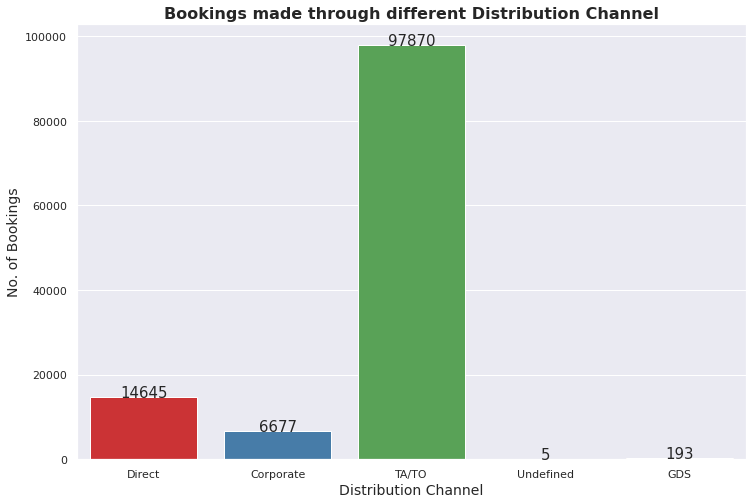

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='distribution_channel', data=df)
ax.set_title('Bookings made through different Distribution Channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Distribution Channel',fontsize = 14)
ax.set_ylabel('No. of Bookings',fontsize = 14)

for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


#12. Market Segment Analysis

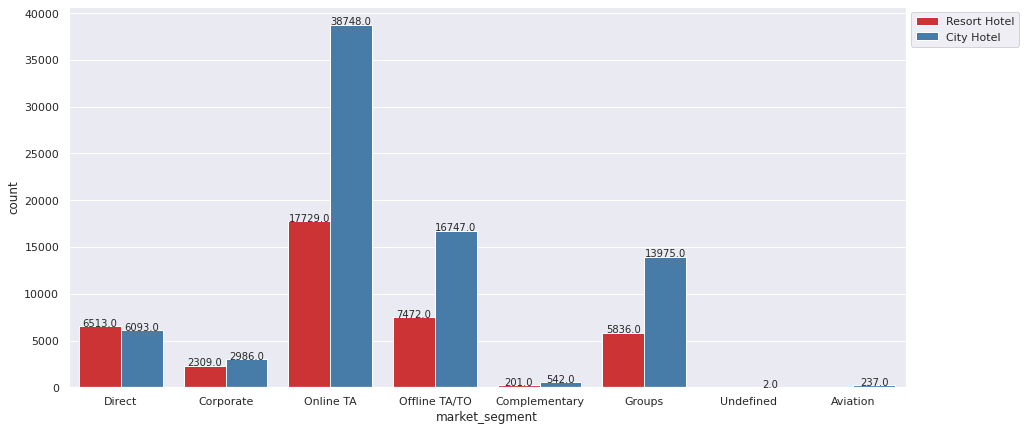

In [ ]:
fig,axes=plt.subplots(figsize=(15,7))
ax=sns.countplot(data=df,x=df['market_segment'],hue="hotel")
plt.legend(bbox_to_anchor=(1,1))
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 10)


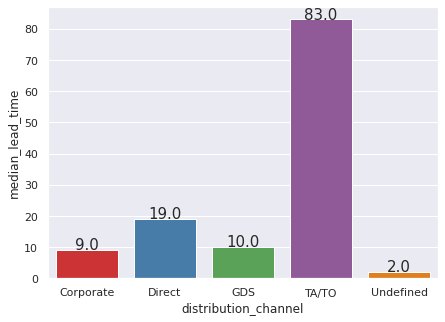

In [ ]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
ax=sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);



#13. Distribution channel brings better revenue generating deals for hotels

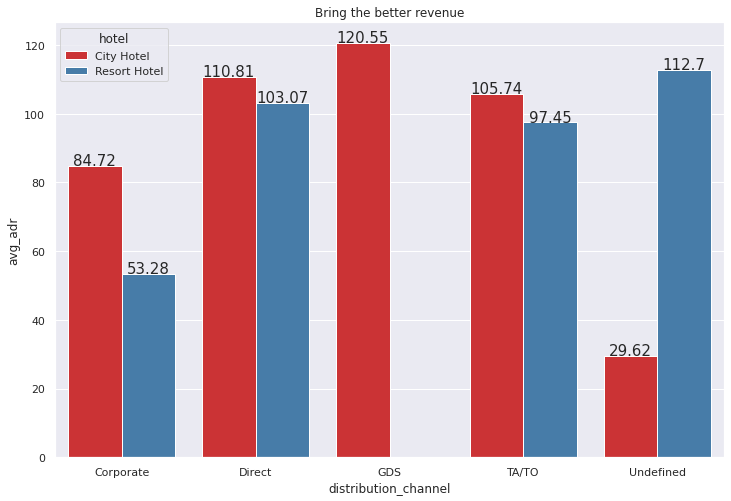

In [ ]:
group_by_dc_hotel = df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
ax=sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
ax.set_title('Bring the better revenue')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


In [ ]:
d5

,distribution_channel,hotel,avg_adr
0,Corporate,City Hotel,84.72
1,Corporate,Resort Hotel,53.28
2,Direct,City Hotel,110.81
3,Direct,Resort Hotel,103.07
4,GDS,City Hotel,120.55
5,TA/TO,City Hotel,105.74
6,TA/TO,Resort Hotel,97.45
7,Undefined,City Hotel,29.62
8,Undefined,Resort Hotel,112.70


#14. Price variation

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


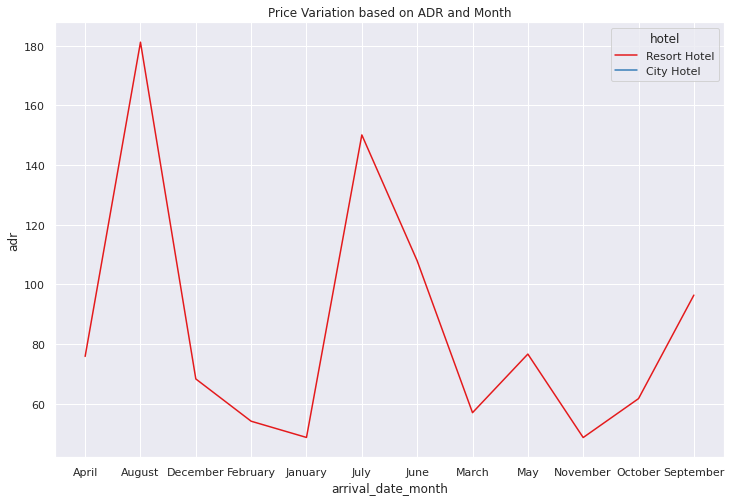

In [ ]:
ax=sns.lineplot(x=resort_hotel['arrival_date_month'],y=resort_hotel['adr'],hue='hotel',data=df)
plt.title("Price Variation based on ADR and Month");


price variation between ADR(Average Daily Rate) and customer arrival month


#15. Cancelled Hotel Percentage

In [ ]:
is_cancle=(df["is_canceled"]).value_counts().rename(index={0:'not_cancle',1:'cancled'})
is_cancle=pd.DataFrame(is_cancle)
is_cancle

,is_canceled
not_cancle,75166
cancled,44224


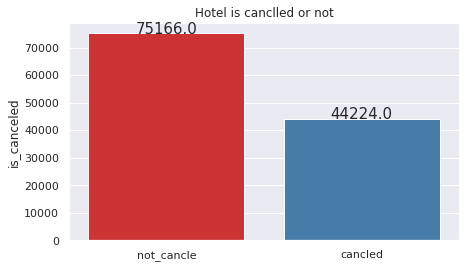

In [ ]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x=is_cancle.index,y=is_cancle['is_canceled'])
plt.title('Hotel is canclled or not')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


In [ ]:
cancelled= df[df['is_canceled'] == 1]
cancel_grp = cancelled.groupby('hotel')
d1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
d2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
d3 = pd.concat([d1,d2], axis = 1)
d3['cancel_%'] = round((d3['total_cancelled_bookings']/d3['total_bookings'])*100,2)
d3


,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,33102,79330,41.73
Resort Hotel,11122,40060,27.76


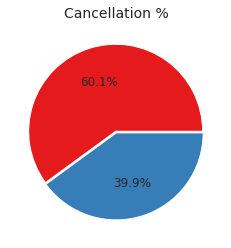

In [ ]:
plt.figure(figsize=(7,4))
plt.pie(d3['cancel_%'],explode=[0.01, 0.01], autopct='%1.1f%%');
plt.title('Cancellation %',fontsize=14);

The figure shows the cancellation and successful booking status and percentage of the overall data of the customers and hotels.

#16. Highest reserved room type

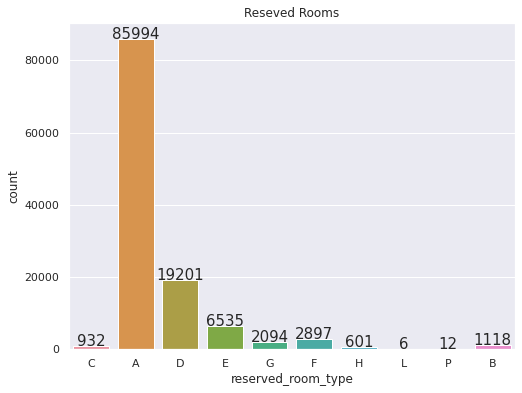

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(df['reserved_room_type'])
plt.title('Reseved Rooms')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


Here we are analyzing the data of the bookings of room types. How many room types are there and customers’ preferences for the various room types? Based on these hotels can concentrate on which room most customers preferred and make a profit with the analysis


#17. Deposit type

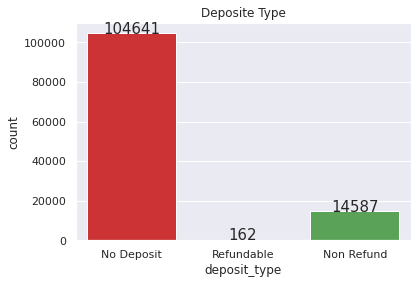

In [ ]:
plt.figure(figsize=(6,4))
ax=sns.countplot(df["deposit_type"])
plt.title('Deposite Type')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


This analysis explains how customers prefer the hotel stay, most of the customers are taking accommodation without making any deposit and post completion of the stay or during the checkout customers’ making the payment.


#18. Guests from top 10 countries


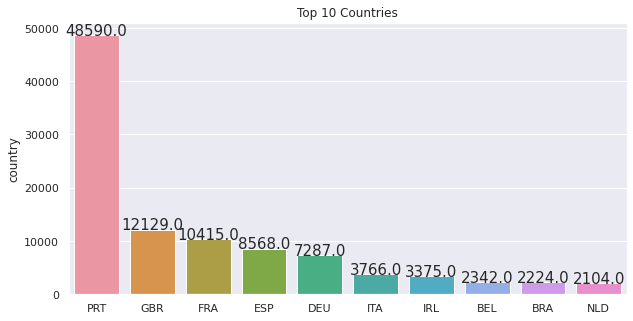

In [ ]:
country=(df['country'].value_counts()).head(10)
plt.figure(figsize=(10,5))
ax=sns.barplot(x=country.index,y=country)
plt.title("Top 10 Countries")
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


Most of the customers are from PTR(Portugal) country

#19. Most of the bookings are cancelled have waiting period

Text(0.5, 1.0, 'KDE plot for lead')

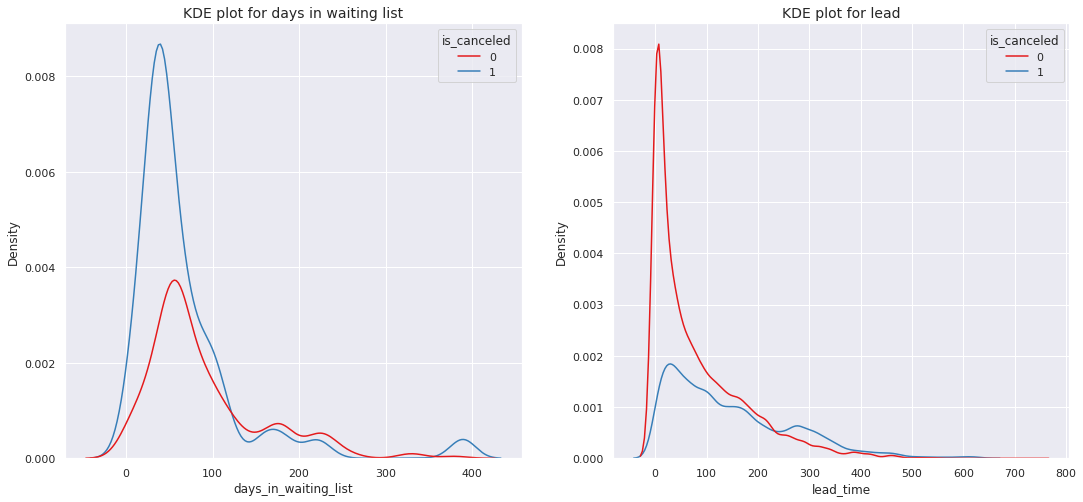

In [ ]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
graph=sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
graph1=sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
graph.set_title('KDE plot for days in waiting list',fontsize=14)
graph1.set_title('KDE plot for lead',fontsize=14)

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings


#20. Customer type

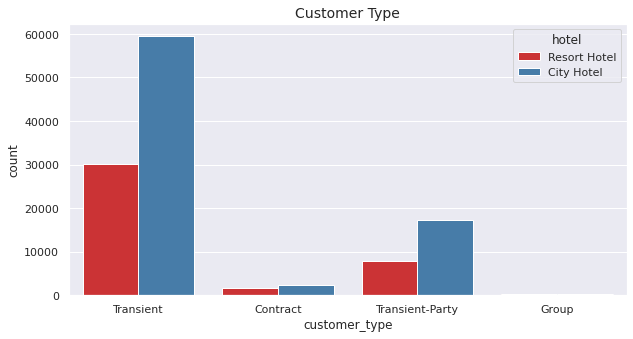

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['customer_type'],hue='hotel',data=df)
plt.title('Customer Type',fontsize=14);

#21. Total no of special requests

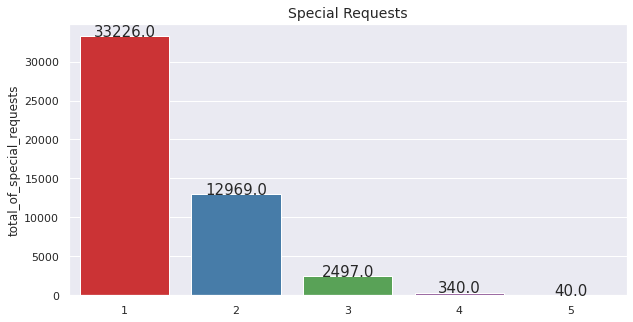

In [ ]:
plt.figure(figsize=(10,5))
x=df['total_of_special_requests'].value_counts()
x=pd.DataFrame(x)
x=x[1:]
ax=sns.barplot(x=x['total_of_special_requests'].index,y=x['total_of_special_requests'])
plt.title('Special Requests',fontsize=14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


Looking at the below data could see most of the requests are single and two requests are less than 50% of single requests. Hence hotels should concentrate on this type of data and serve the customers accordingly.



#22. Reservation Status

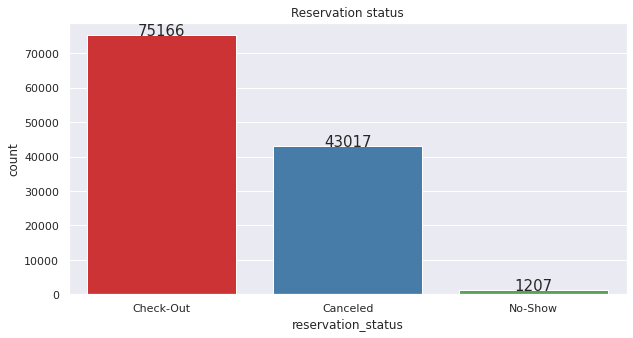

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df['reservation_status'])
plt.title('Reservation status')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);


From the below graph, it is clear evidence that the customers are checking out after their stay but also customers are not showing up though their stay status is successful. Hotels should concentrate on this issue and try to find a way to minimize these

#23. Car Parking Spaces

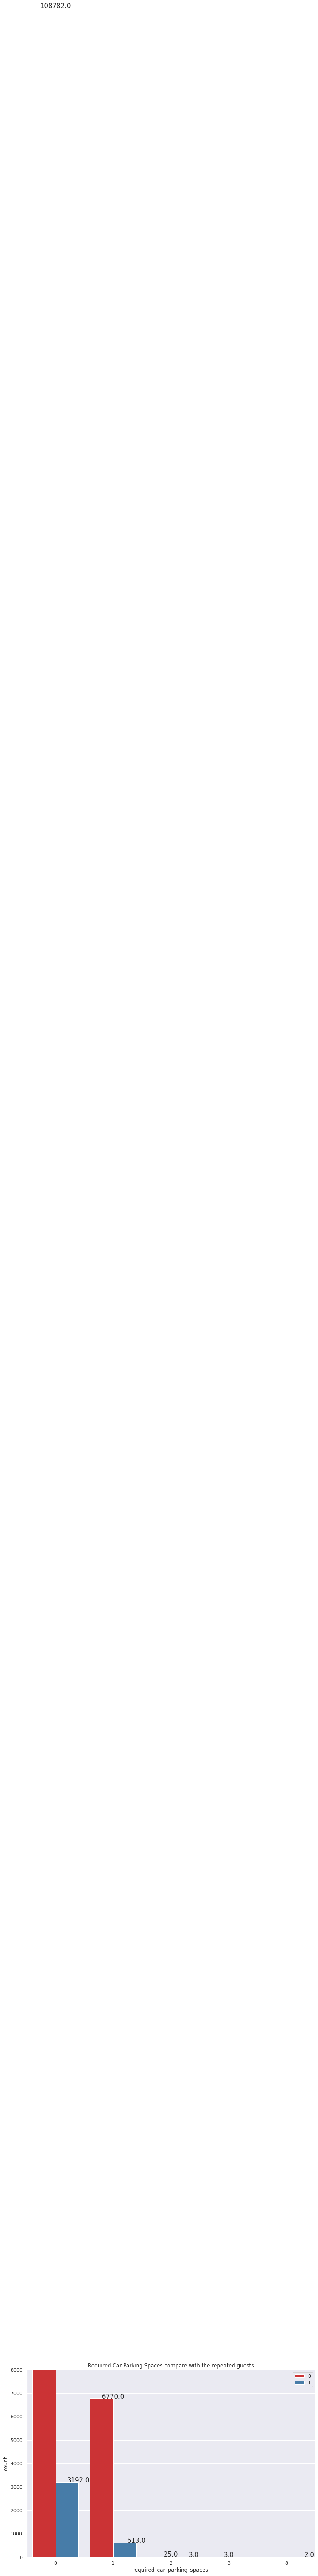

In [ ]:
ax=sns.countplot(df["required_car_parking_spaces"],hue="is_repeated_guest",data=df)
plt.title("Required Car Parking Spaces compare with the repeated guests")
plt.ylim(0,8000)
plt.legend(bbox_to_anchor=(1,1))
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 1,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15);

Could see car parking space requests are more from new customers and very few from repeat customers. Hence hotels should be more attentive to this analysis and act accordingly.
